<a href="https://colab.research.google.com/github/nikxlvii/pytorch/blob/main/dog_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [7]:
cifar10 = datasets.CIFAR10(root='./data',train=True,download=False,transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(root='./data',train=False,download=False,transform=transforms.ToTensor())

In [9]:
imgs = torch.stack([img_t for img_t, _ in cifar10],dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [10]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [11]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [12]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [21]:
transformed_cifar = datasets.CIFAR10(root='./data',train=True,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))
transformed_cifar_val = datasets.CIFAR10(root='./data',train=False,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))

In [23]:
label_map = {3:0,5:1}
class_names = ['cat','dog']

In [26]:
final_cifar = [(img, label_map[label]) for img, label in transformed_cifar if label in [3, 5]]
final_cifar_val = [(img, label_map[label]) for img, label in transformed_cifar_val if label in [3, 5]]

In [27]:
len(final_cifar),len(final_cifar_val)

(10000, 2000)

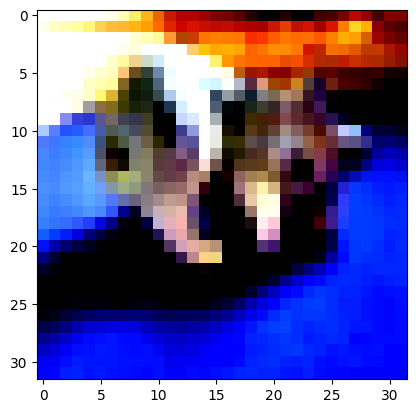

In [28]:
img_t,_ = final_cifar[99]
plt.imshow(img_t.permute(1,2,0)) # use permute to change the order of the axes from C × H × W to H × W × C

In [29]:
# defining our own neural network

class Net(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv2 = nn.Conv2d(16,32,kernel_size = 3,padding = 1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(32 * 16 * 16, 128)
    self.act3 = nn.Tanh()

    self.fc2 = nn.Linear(128, 2)

  def forward(self,x):
    x = self.act1(self.conv1(x))
    x = self.pool1(x)

    x = self.act2(self.conv2(x))
    x = self.pool2(x)

    x = self.flat(x)
    x = self.act3(self.fc1(x))

    x = self.fc2(x)

    return x

In [30]:
model = Net()